In [ ]:
import pandas as pd
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [5]:
X_train_full = (train[[str(i) for i in range(784)]]/255.).values.reshape(-1,28,28,1)
y_train_full = train['digit'].values
z_train_full = train['letter']

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
datagen = ImageDataGenerator(
    rotation_range = 36,
    zoom_range = 0.20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    validation_split=0.25
)

In [8]:
batch_size = 32
train_generator = datagen.flow(
    X_train_full, y_train_full,
    batch_size=batch_size,
    subset='training'
)
validation_generator = datagen.flow(
    X_train_full, y_train_full,
    batch_size=batch_size,
    subset='validation'
)

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [10]:
z_train = np.array(z_train_full)

In [11]:
z_train

array(['L', 'B', 'L', ..., 'A', 'Z', 'Z'], dtype=object)

In [12]:
from string import ascii_uppercase
alpha_list = list(ascii_uppercase)

In [13]:
z_train[0]

'L'

In [14]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(z_train)

In [15]:
z = to_categorical(integer_encoded)

In [16]:
z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [17]:
z.shape

(2048, 26)

In [18]:
alpha_list[np.argmax(z[0])]

'L'

In [19]:
batch_size=32
train_generator2 = datagen.flow(
    X_train_full, z,
    batch_size=batch_size,
    subset='training'
)
validation_generator2 = datagen.flow(
    X_train_full, z,
    batch_size=batch_size,
    subset='validation'
)

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=3, padding="same", activation="relu",
                       input_shape=(28,28,1)))
model.add(layers.Conv2D(32, kernel_size=3, padding="same", activation="relu",))
model.add(layers.Conv2D(32, kernel_size=3, strides=2, activation="relu"))
model.add(layers.Dropout(0.3))
          
model.add(layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"))
model.add(layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"))
model.add(layers.Conv2D(64, kernel_size=3, strides=2, activation="relu"))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, kernel_size=3, padding="same", activation="relu"))
model.add(layers.Conv2D(128, kernel_size=3, padding="same", activation="relu"))
model.add(layers.Conv2D(128, kernel_size=3, strides=2, activation="relu"))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(256, kernel_size=3, padding="same", activation="relu"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(26, activation="softmax"))

In [32]:
input_ = layers.Input(shape=(28,28,1))
x = layers.Conv2D(32, kernel_size=3, padding="same", activation="relu")(input_)
x = layers.Conv2D(32, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Conv2D(32, kernel_size=3, strides=2, activation="relu")(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(64, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Conv2D(64, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Conv2D(64, kernel_size=3, strides=2, activation="relu")(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(128, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Conv2D(128, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Conv2D(128, kernel_size=3, strides=2, activation="relu")(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(256, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x1 = layers.Dense(26, activation = "softmax")(x)

model1 = models.Model(inputs=input_, outputs=x1)


In [40]:
x_ = layers.Dense(128, activation="relu")(x)
x1_ = layers.Dense(128, activation="relu")(x1)
y = layers.Concatenate(axis=1)([x_, x1])
output_ = layers.Dense(10, activation="softmax")(y)
#model2= models.Model(inputs=[x_, x1_], outputs=output_)

In [42]:
model2= models.Model(inputs=input_, outputs=output_)

In [43]:
model2.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 28, 28, 32)   320         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 28, 28, 32)   9248        conv2d_25[0][0]                  
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 13, 13, 32)   9248        conv2d_26[0][0]                  
____________________________________________________________________________________________

In [22]:
input_l = layers.Input(shape=(28,28,1))
x = layers.Conv2D(32, kernel_size=3, padding="same", activation="relu")(input_l)
x = layers.Conv2D(32, kernel_size=3, padding="valid",strides=2, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(64, kernel_size=3, padding="valid",strides=2, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(128, kernel_size=3, padding="valid",strides=2, activation="relu")(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv2D(128, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

output_l = layers.Dense(26, activation = "softmax")(x)

base_model_l = models.Model(inputs=[input_l], outputs=[output_l])

In [23]:
model2.compile(optimizer="rmsprop", loss="categorical_crossentropy", 
             metrics=["accuracy"])

In [44]:
epochs = 200
history = model.fit_generator(
    train_generator2, 
    epochs = epochs,
    validation_data = validation_generator2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 48 steps, validate for 16 steps
Epoch 1/200
48/48 [==============================] - 1s 11ms/step - loss: 0.5085 - accuracy: 0.8451 - val_loss: 0.6903 - val_accuracy: 0.8105
Epoch 2/200
48/48 [==============================] - 1s 11ms/step - loss: 0.4899 - accuracy: 0.8626 - val_loss: 0.5883 - val_accuracy: 0.8125
Epoch 3/200
48/48 [==============================] - 1s 11ms/step - loss: 0.4717 - accuracy: 0.8594 - val_loss: 0.7278 - val_accuracy: 0.7793
Epoch 4/200
48/48 [==============================] - 1s 11ms/step - loss: 0.4843 - accuracy: 0.8457 - val_loss: 0.6798 - val_accuracy: 0.8164
Epoch 5/200
48/48 [==============================] - 1s 11ms/step - loss: 0.4154 - accuracy: 0.8717 - val_loss: 0.5788 - val_accuracy: 0.8418
Epoch 6/200
48/48 [==============================] - 1s 11ms/step - loss: 0.4736 - accuracy: 0.8600 - val_loss: 0.5888 - val_accuracy: 0.8184
Epoch 7/200
48/48 [==============================] - 1s 

Epoch 57/200
48/48 [==============================] - 1s 11ms/step - loss: 0.5248 - accuracy: 0.8522 - val_loss: 0.6588 - val_accuracy: 0.8047
Epoch 58/200
48/48 [==============================] - 1s 11ms/step - loss: 0.4884 - accuracy: 0.8516 - val_loss: 0.5864 - val_accuracy: 0.8301
Epoch 59/200
48/48 [==============================] - 1s 11ms/step - loss: 0.5004 - accuracy: 0.8561 - val_loss: 0.5645 - val_accuracy: 0.8320
Epoch 60/200
48/48 [==============================] - 1s 11ms/step - loss: 0.5201 - accuracy: 0.8470 - val_loss: 0.6137 - val_accuracy: 0.8242
Epoch 61/200
48/48 [==============================] - 1s 11ms/step - loss: 0.5005 - accuracy: 0.8451 - val_loss: 0.5764 - val_accuracy: 0.8418
Epoch 62/200
48/48 [==============================] - 1s 11ms/step - loss: 0.5096 - accuracy: 0.8529 - val_loss: 0.7039 - val_accuracy: 0.8066
Epoch 63/200
48/48 [==============================] - 1s 11ms/step - loss: 0.5322 - accuracy: 0.8385 - val_loss: 0.5531 - val_accuracy: 0.8418

48/48 [==============================] - 1s 11ms/step - loss: 0.6018 - accuracy: 0.8262 - val_loss: 0.6814 - val_accuracy: 0.8223
Epoch 115/200
48/48 [==============================] - 1s 11ms/step - loss: 0.5186 - accuracy: 0.8451 - val_loss: 0.7362 - val_accuracy: 0.7969
Epoch 116/200
48/48 [==============================] - 1s 11ms/step - loss: 0.6165 - accuracy: 0.8372 - val_loss: 0.7154 - val_accuracy: 0.8086
Epoch 117/200
48/48 [==============================] - 1s 11ms/step - loss: 0.5248 - accuracy: 0.8542 - val_loss: 0.6368 - val_accuracy: 0.8262
Epoch 118/200
48/48 [==============================] - 1s 11ms/step - loss: 0.4952 - accuracy: 0.8587 - val_loss: 0.6927 - val_accuracy: 0.7969
Epoch 119/200
48/48 [==============================] - 1s 11ms/step - loss: 0.6195 - accuracy: 0.8385 - val_loss: 0.6843 - val_accuracy: 0.7988
Epoch 120/200
48/48 [==============================] - 1s 11ms/step - loss: 0.5097 - accuracy: 0.8431 - val_loss: 0.7374 - val_accuracy: 0.8164
Epoch 

Epoch 171/200
48/48 [==============================] - 1s 11ms/step - loss: 0.6719 - accuracy: 0.8294 - val_loss: 0.7473 - val_accuracy: 0.7988
Epoch 172/200
48/48 [==============================] - 1s 11ms/step - loss: 0.6782 - accuracy: 0.8151 - val_loss: 0.6061 - val_accuracy: 0.8359
Epoch 173/200
48/48 [==============================] - 1s 11ms/step - loss: 0.6744 - accuracy: 0.8288 - val_loss: 0.6722 - val_accuracy: 0.7969
Epoch 174/200
48/48 [==============================] - 1s 11ms/step - loss: 0.6691 - accuracy: 0.8327 - val_loss: 0.7175 - val_accuracy: 0.7676
Epoch 175/200
48/48 [==============================] - 1s 11ms/step - loss: 0.6040 - accuracy: 0.8203 - val_loss: 0.6771 - val_accuracy: 0.8086
Epoch 176/200
48/48 [==============================] - 1s 11ms/step - loss: 0.6336 - accuracy: 0.8301 - val_loss: 0.6498 - val_accuracy: 0.7969
Epoch 177/200
48/48 [==============================] - 1s 11ms/step - loss: 0.6710 - accuracy: 0.8229 - val_loss: 0.6288 - val_accuracy:

In [ ]:
input_i = layers.Input(shape=(28,28,1))
x = layers.Conv2D(32, kernel_size=3, padding="same", activation="relu")(input_i)
x = layers.Conv2D(32, kernel_size=3, padding="valid",strides=2, activation="relu")(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv2D(64, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Conv2D(64, kernel_size=3, padding="valid",strides=2, activation="relu")(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv2D(128, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Conv2D(128, kernel_size=3, padding="valid",strides=2, activation="relu")(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv2D(128, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

c = base_model_l(input_i)
n = layers.concatenate([x, c])

x = layers.Dense(64, activation='relu')(n)

output_i = layers.Dense(10, activation = "softmax")(x)

base_model_i = models.Model(inputs=[input_i], outputs=[output_i])

In [ ]:
model = base_model_i
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", 
             metrics=["accuracy"])

In [ ]:
epochs = 200
history = model.fit_generator(
    train_generator, 
    epochs = epochs,
    validation_data = validation_generator)

In [29]:
X_train_full[0].shape

(28, 28, 1)

In [25]:
print(
    f"Train accuracy={max(history.history['accuracy']):.5f}, " +
    f"Validation accuracy={max(history.history['val_accuracy']):.5f}"
)

Train accuracy=0.86784, Validation accuracy=0.84180


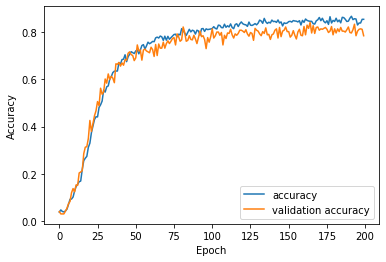

In [26]:
plt.figure()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()